In [108]:
import pandas as pd
import numpy as np


In [109]:
df = pd.read_csv("train.csv")

In [110]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


# Balanced Data Set

In [112]:
df.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

# EDA to check for NA values

In [113]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [114]:
df.dropna(inplace=True)

In [115]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [116]:
df.label.value_counts()

0    10361
1     7924
Name: label, dtype: int64

## Preprocessing

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [118]:
#max features - building a vocabulary # strip accents=ascii removes accents and character normalizes
# Focusiing on unigrams and bigrams
tfidf = TfidfVectorizer(strip_accents='ascii', stop_words=stopwords, ngram_range=(1,2), max_features=1000)
text_col = 'title'

In [119]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [120]:
target_var = "label"
X = df.drop(target_var,axis =1)
#X.head()
#get dependent variables
y = df[target_var]
#y.head()

In [121]:
X.shape

(18285, 4)

In [122]:
df.shape

(18285, 5)

## Preprocessing and Pipelines

In [123]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


In [107]:
categorical_transformation = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"))

In [127]:
cat_cols = X.title

In [128]:
preprocessor = make_column_transformer((categorical_transformation, cat_cols))

In [129]:
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'))]),
                                 0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: title, Length: 18285, dty

In [ ]:
TfidfVectorizer(strip_accents='ascii', stop_words=stopwords, ngram_range=(1,2), max_features=1000)
text_col = 'title'

In [132]:
pipe = make_pipeline(RandomForestClassifier())

In [ ]:
pipe = Pipeline([
    ('col_selector', ColumnSelector(cols=('title'), drop_axis=True)),
    ('vectorize', TfidfVectorizer(strip_accents='ascii', stop_words=stopwords, ngram_range=(1,2), max_features=1000)),
    ('clf', RandomForestClassifier()),
])


pipe.fit(X_train,y_train)

# Applying our tfid vectorizer

In [56]:
X = tfidf.fit_transform(df[text_col]).toarray()
X.shape #(18285, 5000)
y = df[target_var]



In [57]:
X.shape

(18285, 1000)

# Train, Test, Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [63]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
tfidf.get_feature_names()[:100]


['000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '16',
 '20',
 '2016',
 '2017',
 '30',
 '50',
 'abedin',
 'abortion',
 'abuse',
 'access',
 'access pipeline',
 'accused',
 'across',
 'act',
 'action',
 'activists',
 'ad',
 'administration',
 'admits',
 'adviser',
 'afghan',
 'african',
 'agenda',
 'agents',
 'ahead',
 'aid',
 'air',
 'airport',
 'al',
 'aleppo',
 'alert',
 'alien',
 'aliens',
 'already',
 'ambassador',
 'america',
 'american',
 'americans',
 'americas',
 'amid',
 'ann',
 'ann coulter',
 'announces',
 'anonymous',
 'another',
 'anthony',
 'anti',
 'anti trump',
 'apple',
 'arabia',
 'army',
 'around',
 'arrest',
 'arrested',
 'arrests',
 'art',
 'ask',
 'asks',
 'assange',
 'assault',
 'attack',
 'attacks',
 'attorney',
 'audio',
 'avoid',
 'away',
 'baby',
 'back',
 'bad',
 'ban',
 'bank',
 'banks',
 'bannon',
 'battle',
 'become',
 'begins',
 'behind',
 'berkeley',
 'bernie',
 'bernie sanders',
 'best',
 'better',
 'big',
 'biggest',
 'bill',
 'bill clinton',
 'bil

In [68]:
tfidf.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as'

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


In [84]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [74]:
rfc.score(X_train, y_train)

0.9962400875034181

In [88]:
y_pred = rfc.predict(X_test)

In [89]:
score = accuracy_score(y_test, y_pred)

In [90]:
print("Accuracy: %0.3f"%score)


Accuracy: 0.916


In [93]:
confusion_matrix(y_test, y_pred)

array([[1842,  240],
       [  69, 1506]])

# Confusion matrix to see results

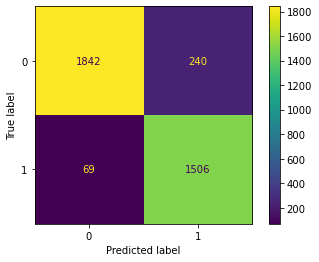

In [94]:
plot_confusion_matrix(rfc, X_test, y_test)


In [95]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [78]:
from sklearn.naive_bayes import MultinomialNB

In [79]:
mnb = MultinomialNB()

In [80]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [81]:
mnb.score(X_train, y_train)

0.874145474432595

In [82]:
y_pred = mnb.predict(X_test)

In [86]:
score = accuracy_score(y_test,y_pred)


In [87]:
print("Accuracy: %0.3f"%score)


Accuracy: 0.858


In [99]:
from joblib import dump, load

In [101]:
dump(rfc, "fake_news_model.joblib")

['fake_news_model.joblib']

# Creating a Pipeline to do it in one step

In [ ]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Choosing x and y and fitting pipe

In [ ]:
target_var = "label"
y = df[target_var]
X = df.drop(target_var, axis=1)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X["title"], y, test_size=0.2, random_state=42)

stop_words = stopwords.words('english')

pipe = Pipeline([
    ('vectorize', TfidfVectorizer(strip_accents='ascii', stop_words=stop_words, ngram_range=(1,2), max_features=1000)),
    ('clf', RandomForestClassifier())
])


pipe.fit(X_train, y_train)

# Saving model(pipe) for further use

In [ ]:
dump(pipe, "fake_news_model_rfc.joblib")